# Statistics in python
_______
## Measures of center - `mean` , `median` , `mode`
- Mean - '*the typical value*' - sum of all observations divided by the total no. of observations - `np.median()`
- Median - '*the exact middle value*' - midpoint of the observed values **sorted in order** - `np.median()`
- Mode - '*the most occurred observed value*' - its the count of how many times each of the observed values has occurred - `df.value_counts()`
<br>
<br>
- Mean is impacted to a greater extent by the extreme values while the median is much more stable measure of centre. 
- Thus , the median is less impacted by fluctuations or anomalies than the mean.
- Mean and median would be same if the data is symmetrically distributed ; however they'd be distinct values if the data is skewed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
foodcon = pd.read_csv('./course_datasets/stats_datasets/food_consumption.csv', index_col=0)
foodcon.head()

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96


In [3]:
ricecon = foodcon[foodcon["food_category"]=="rice"]
ricecon.head()

,country,food_category,consumption,co2_emission
9,Argentina,rice,8.77,11.22
20,Australia,rice,11.03,14.12
31,Albania,rice,7.78,9.96
42,Iceland,rice,3.89,4.98
53,New Zealand,rice,9.16,11.72


<Axes: ylabel='Frequency'>

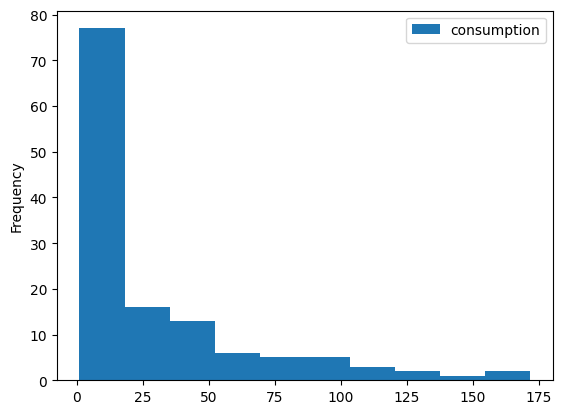

In [4]:
ricecon.plot("co2_emission",kind='hist')

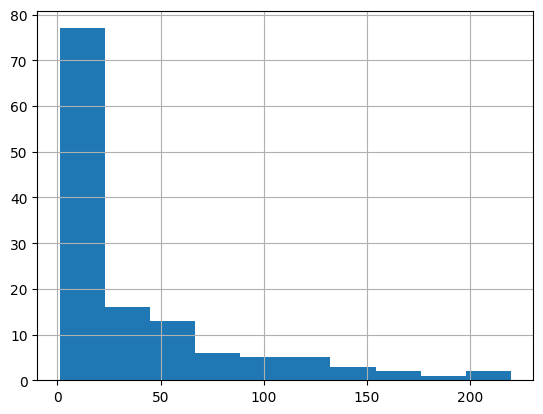

In [5]:
ricecon["co2_emission"].hist()
plt.show()

In [6]:
ricecon["co2_emission"].agg(['mean','median'])

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64

____
## Measures of spread
## 1. Variance : 
Its basically the distance of each data point to the data's mean. <br><br>
As per its mathematical representation, its the square of the sum of each values distance from the mean ; divided by the total no. of points inthe dataset

In [7]:
np.random.seed(123)
d1= np.random.randint(15,500,10)
dlist = {"col1":d1}
sample_df = pd.DataFrame(dlist)

In [8]:
sample_df

,col1
0,380
1,397
2,337
3,491
4,113
5,245
6,32
7,98
8,121
9,138


### Calculating variance manually

In [9]:
# Calculating distance of each point to the mean
dist = sample_df["col1"] - np.mean(sample_df["col1"])
print(dist)

# Squaring each distance value
sq_dist = dist **2
print(sq_dist)

# sum squared distances
sum_sq_dist = np.sum(sq_dist)
print(sum_sq_dist)

# Divide by total no. of points
final_variance = sum_sq_dist / (len(sample_df["col1"]))

0    144.8
1    161.8
2    101.8
3    255.8
4   -122.2
5      9.8
6   -203.2
7   -137.2
8   -114.2
9    -97.2
Name: col1, dtype: float64
0    20967.04
1    26179.24
2    10363.24
3    65433.64
4    14932.84
5       96.04
6    41290.24
7    18823.84
8    13041.64
9     9447.84
Name: col1, dtype: float64
220575.59999999998


In [10]:
final_variance

np.float64(22057.559999999998)

### Using the `np.var()`
`ddof=1` is used when variance is being calculated for a full population of the data (also called population variance) ; else it is set to `ddof=0` by default (sample variance)

In [11]:
print(np.mean(sample_df["col1"]))
print(np.min(sample_df["col1"]))
print(np.max(sample_df["col1"]))

235.2
32
491


In [12]:
np.var(sample_df["col1"])

np.float64(22057.559999999998)

In [13]:
np.var(sample_df["col1"],ddof=1)

np.float64(24508.399999999998)

<Axes: >

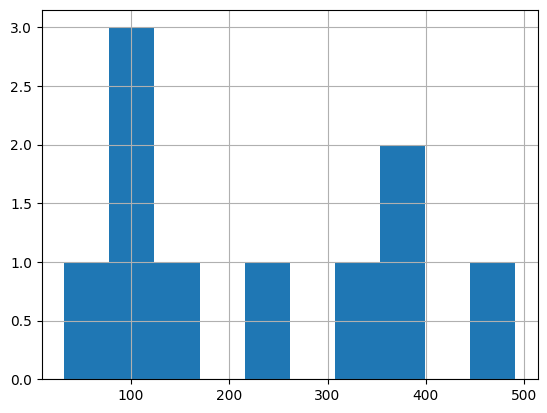

In [14]:
sample_df["col1"].hist()

### Q: Why is Variance Large Compared to Mean?
In the above example, one might notice that the value of variance is quite high () compared to the overall mean of the dataset or even the distance of each point from the mean 
- High Variance results from data points being far away from the mean.
- In above example, 32 and 491 are far from 235.2 → **causing a large spread**.
- Variance is in squared units, **so even moderate deviations increase it sharply**.
<br><br>
- If the variance is small, it means most numbers are close to the mean. If the variance is large, it means the numbers are spread out more widely.
- **A higher variance indicates greater variability, meaning the data is spread, while a lower variance suggests the data points are closer to the mean.**

## 2. Standard Deviation
Its the sqrt of the variance. This is a much better measure to interpret than variance.<br>
Standard deviation is more interpretable, which is why it's more commonly reported in descriptive statistics and visuals.

In [15]:
np.std(sample_df["col1"])

np.float64(148.51787771174216)

In [16]:
np.std(sample_df["col1"],ddof=1)

np.float64(156.55158894115382)

In [17]:
np.random.normal()

-0.4419976105786816

In [18]:
np.array([[2,3],[4,5]])

array([[2, 3],
       [4, 5]])

## 3. Mean Absolute Distance (MAD)
- Mean of the absolute distances of all points from the mean.<br>
- The Standard deviation penalizes longer distances more than shorter distsances fomr the mean
- MAD however penalizes all distances equally

In [19]:
dists = sample_df["col1"] - np.mean(sample_df["col1"])
dists

0    144.8
1    161.8
2    101.8
3    255.8
4   -122.2
5      9.8
6   -203.2
7   -137.2
8   -114.2
9    -97.2
Name: col1, dtype: float64

In [20]:
np.mean(np.abs(dists))

np.float64(134.8)

## 4. Quartiles
- Quantiles divide a dataset into equal-sized intervals, each containing the same number of data points.<br>
- So Quartiles divide the data into 4 equal parts.

In [21]:
np.quantile(sample_df["col1"],0.5)

np.float64(191.5)

In [22]:
np.quantile(sample_df["col1"],[0,0.25,0.5,0.75,1])

array([ 32.  , 115.  , 191.5 , 369.25, 491.  ])

Creating a box plot for the `sample_df` dataset

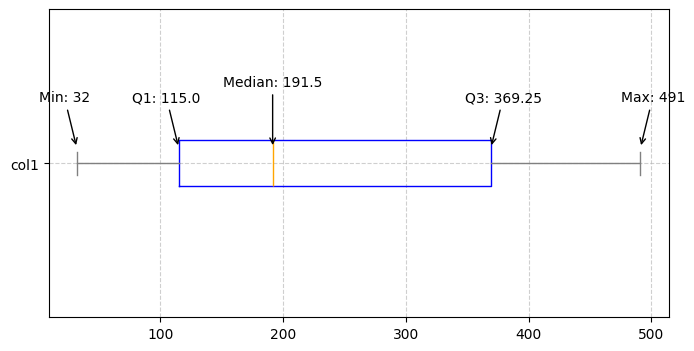

In [23]:
fig,ax = plt.subplots(figsize=(8,4))

plt.boxplot(sample_df["col1"],vert=False,
            boxprops=dict(color='blue'),
            medianprops=dict(color='orange'),
            whiskerprops=dict(color="grey"),
            capprops=dict(color="grey"),
            flierprops=dict(marker='o', markerfacecolor='red', markersize=10))
# Enabling grid
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_yticklabels(['col1'])

# Adding annotations
q1 = sample_df['col1'].quantile(0.25)
q2 = sample_df['col1'].quantile(0.5)  # median
q3 = sample_df['col1'].quantile(0.75)
min_val = sample_df['col1'].min()
max_val = sample_df['col1'].max()

ax.annotate(f'Q1: {q1}', xy=(q1, 1.05), xytext=(q1 - 10, 1.2),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=10, ha='center')

ax.annotate(f'Median: {q2}', xy=(q2, 1.05), xytext=(q2, 1.25),
            arrowprops=dict(facecolor='black', arrowstyle='->'), 
            fontsize=10, ha='center')

ax.annotate(f'Q3: {q3}', xy=(q3, 1.05), xytext=(q3 + 10, 1.2),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=10, ha='center')

ax.annotate(f'Min: {min_val}', xy=(min_val, 1.05), xytext=(min_val - 10, 1.2),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=10, ha='center')

ax.annotate(f'Max: {max_val}', xy=(max_val, 1.05), xytext=(max_val + 10, 1.2),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=10, ha='center')

plt.show()

In [24]:
# How IQR is calculated
np.quantile(sample_df["col1"],0.75) - np.quantile(sample_df["col1"], 0.25)
# This is the height of the boxplot

np.float64(254.25)

In [25]:
np.mean(sample_df["col1"])

np.float64(235.2)

In [26]:
np.median(sample_df["col1"])

np.float64(191.5)

### Finding outliers
Finding those values that are below Q1 and above Q3

In [27]:
from scipy.stats import iqr

In [28]:
iqr = iqr(sample_df["col1"])
print(iqr)

254.25


In [29]:
lower_thresholds = np.quantile(sample_df["col1"],0.25) - 1.5 * iqr
upper_thresholds = np.quantile(sample_df["col1"], 0.75) + 1.5 * iqr
print(f'Lower than:{lower_thresholds} , Higher than:{upper_thresholds}')

Lower than:-266.375 , Higher than:750.625


Now filtering from the dataset

In [30]:
sample_df[(sample_df["col1"]< lower_thresholds) | (sample_df["col1"]> upper_thresholds)]

,col1


In our example, we dont have any outliers

___
## Test questions
Applying measures of center & spread to the `foodcon` dataset

In [31]:
foodcon.groupby("food_category")["co2_emission"].agg([np.var,np.std])

C:\Users\ABHIJEET.BHAMBERE\AppData\Local\Temp\ipykernel_11780\405836586.py:1: FutureWarning: The provided callable <function var at 0x000001F4497DF740> is currently using SeriesGroupBy.var. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "var" instead.
  foodcon.groupby("food_category")["co2_emission"].agg([np.var,np.std])
C:\Users\ABHIJEET.BHAMBERE\AppData\Local\Temp\ipykernel_11780\405836586.py:1: FutureWarning: The provided callable <function std at 0x000001F4497DF600> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  foodcon.groupby("food_category")["co2_emission"].agg([np.var,np.std])


,var,std
food_category,,
beef,88748.408132,297.906710
dairy,17671.891985,132.935669
eggs,21.371819,4.622966
fish,921.637349,30.358481
lamb_goat,16475.518363,128.356996
nuts,35.639652,5.969895
pork,3094.963537,55.632396
poultry,245.026801,15.653332
rice,2281.376243,47.763754


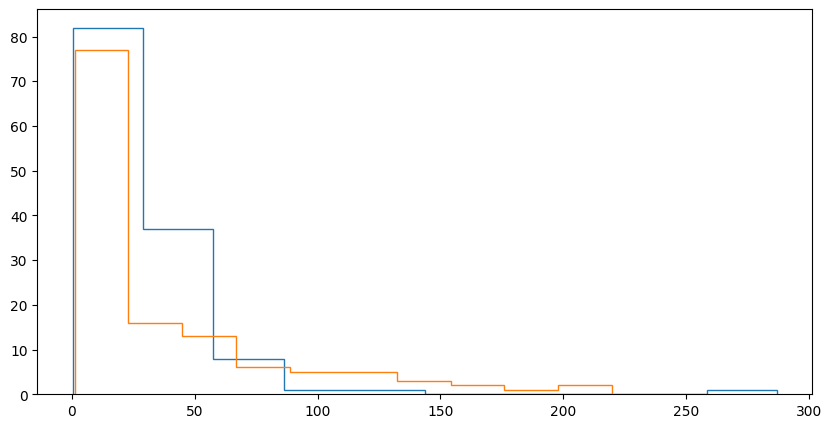

In [32]:
fig,ax = plt.subplots(figsize=(10,5))
ax.hist(foodcon[foodcon["food_category"]=="fish"]["co2_emission"],histtype='step')
ax.hist(foodcon[foodcon["food_category"]=="rice"]["co2_emission"],histtype='step')

plt.show()

_So it can be observed that consumption for both food categories is positively skewed (right-skewed)_ <br><br>

**Next Question:** finding quartiles

In [33]:
foodcon.head()
np.quantile(foodcon["co2_emission"], np.linspace(0,1,5))

array([   0.    ,    5.21  ,   16.53  ,   62.5975, 1712.    ])

In [34]:
# Calculating CO2 emmission per country
co2ems_by_country = foodcon.groupby("country")["co2_emission"].agg("sum")
co2ems_by_country

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64

In [35]:
foodcon_q1 = np.quantile(co2ems_by_country,0.25)
foodcon_q3 = np.quantile(co2ems_by_country, 0.75)
foodcon_iqr = foodcon_q3 - foodcon_q1

In [36]:
lowerthresh = foodcon_q1 - (1.5 * foodcon_iqr)
upperthresh = foodcon_q3 + (1.5 * foodcon_iqr)

In [37]:
co2ems_by_country[(co2ems_by_country<lowerthresh) | (co2ems_by_country>upperthresh)]

country
Argentina    2172.4
Name: co2_emission, dtype: float64

___
# 2. Random numbers & probability
The `sample` method to select randowm row/ rows from the dataset

In [38]:
# Setting the seed to get reproducible results
np.random.seed(42)

In [39]:
# Picking a random sample from a dataframe without replacement
np.random.seed(42)
sample_df.sample()

,col1
8,121


In [40]:
# Picking multiple samples without replacemcement
np.random.seed(42)
sample_df.sample(n=6)

,col1
8,121
1,397
5,245
0,380
7,98
2,337


In [41]:
# Picking multiple samples with replacemcement -- we can see certain rows appear twice
np.random.seed(42)
sample_df.sample(n=6,replace=True)

,col1
6,32
3,491
7,98
4,113
6,32
9,138


## Test question
You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals

In [42]:
amir_deals = pd.read_csv('./course_datasets/stats_datasets/amir_deals.csv')
amir_deals.head()

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17


In [43]:
# Count the number of deals Amir worked on for each product type using .value_counts() and store in counts.
counts = amir_deals["product"].value_counts()
counts

product
Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: count, dtype: int64

In [44]:
rows, columns = amir_deals.shape
rows

178

In [45]:
amir_deals.shape[0]

178

Finding probabilities for each of the counts: <br>
`No. of ways an event occurs / Total no. of possible outcomes`

In [46]:
counts / amir_deals.shape[0]

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64

These are the probabilities of picking one deal from each of the product categories
______
Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.<br>
Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.

In [47]:
# With replacement
amir_deals.sample(n=5)

,Unnamed: 0,product,client,status,amount,num_users
102,103,Product D,New,Lost,1196.53,63
78,79,Product C,Current,Won,1300.89,42
55,56,Product I,Current,Won,1606.86,24
137,138,Product A,Current,Won,5145.01,89
161,162,Product D,Current,Won,4837.09,31


In [48]:
# Without replacement
amir_deals.sample(n=5,replace=True)

,Unnamed: 0,product,client,status,amount,num_users
171,172,Product D,Current,Won,1340.15,66
151,152,Product D,Current,Won,6221.36,2
58,59,Product B,Current,Won,6558.74,90
117,118,Product D,Current,Lost,3416.82,12
159,160,Product B,Current,Won,1676.09,29


In [49]:
dice = pd.DataFrame({"number":[1,2,3,4,5,6]})
dice

,number
0,1
1,2
2,3
3,4
4,5
5,6


______
# Types of Probability Distributions
## 1. Discrete distributions
### A. Mean probability in fair die roll

In [50]:
dice["prob"] = dice["number"].map(dice["number"].value_counts(normalize=True))
dice

,number,prob
0,1,0.166667
1,2,0.166667
2,3,0.166667
3,4,0.166667
4,5,0.166667
5,6,0.166667


In [51]:
np.mean(dice["number"])

np.float64(3.5)

This is the expected value in a fair die roll. <br><br>
### B. Mean probability in a sample of _n_ die rolls
Now simulating 10 die rolls:

In [52]:
np.random.seed(100)
ten_rolls = dice.sample(n=10,replace=True)
ten_rolls

,number,prob
0,1,0.166667
0,1,0.166667
3,4,0.166667
0,1,0.166667
2,3,0.166667
4,5,0.166667
2,3,0.166667
5,6,0.166667
2,3,0.166667
2,3,0.166667


<Axes: >

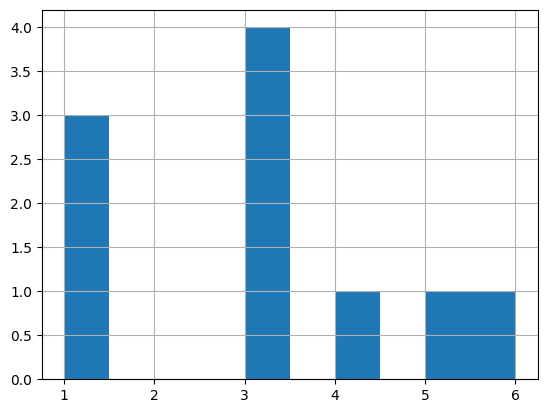

In [53]:
ten_rolls["number"].hist()

In [54]:
ten_rolls["number"].mean()

np.float64(3.0)

This shows that mean probabilty of a simulated die roll is less than the theoretical mean probability (fair die roll) <br><br>
However , **as we increase the no. of die roll samples , the simulated value gets closer to the theoretical value**

3.47
3.531


<Axes: >

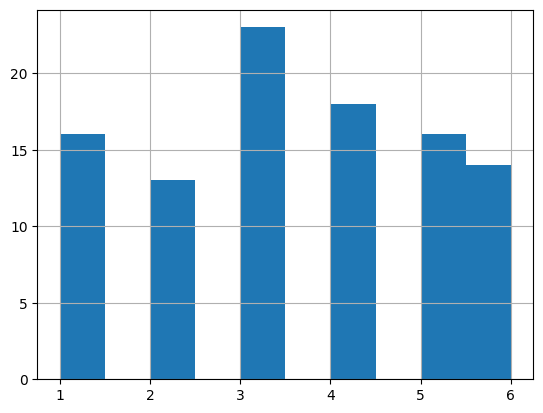

In [55]:
np.random.seed(100)

rolls100 = dice.sample(n=100,replace=True)
print(rolls100["number"].mean())
rolls1K = dice.sample(n=1000,replace=True)
print(rolls1K["number"].mean())
rolls100["number"].hist()


<Axes: >

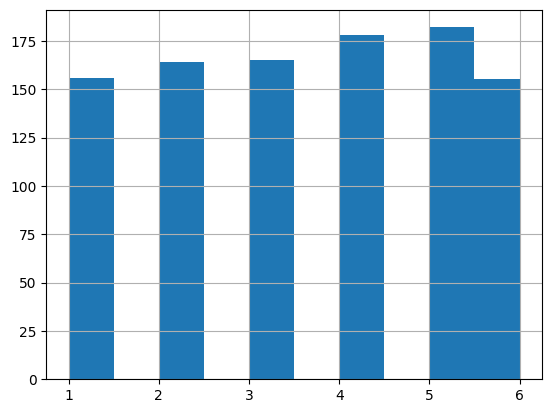

In [56]:
rolls1K["number"].hist()

In [57]:
np.random.seed(100)
dice.sample(n=100,replace=True)["number"].mean()

np.float64(3.47)

____
## Test questions on pandas & numpy

In [58]:
n2d = np.array([[1,2,3,4],[4,5,6,7],[11,12,13,14]])

In [59]:
n2d[2:,2:]

array([[13, 14]])

In [60]:
x=[0,1,-2]
x[1:] = [3,4,5]
print(x)

[0, 3, 4, 5]


In [61]:
x[-1:] = [11,12,13]

In [62]:
x

[0, 3, 4, 11, 12, 13]

In [63]:
x=[1,2,3]
y = [-1, 0.1, 1.1] + x[0:2]

In [64]:
y

[-1, 0.1, 1.1, 1, 2]

In [65]:
x[0:2]

[1, 2]

_______
## 2. Continuous distributions
### Continuous uniform distributions
We're considering example of wait time for a bus service that arrives every 12mins. 

In [66]:
# importing uniform from scipy.stats
from scipy.stats import uniform

**Finding probability between for wait time of 7 mins or less:** 
- The `.cdf()` function helps generate the probability of getting up to and including k successes.
- `P(X <= k)` -- _the probability that an event X occurs for atmost k times_

In [67]:
# Probability of waiting for 7 or less minutes 
uniform.cdf(7,0,12)

np.float64(0.5833333333333334)

In [68]:
# Probability of waiting for 7 or more minutes  (max time is 12)
1 - uniform.cdf(7,0,12)

np.float64(0.41666666666666663)

**Finding probability between 4 to 7 mins (both timestamps inclusive):** <br>
For this we'll subtract P(waitTime <=4min) from P(waitTime>=7min)

In [69]:
uniform.cdf(7,0,12) - uniform.cdf(4,0,12)

np.float64(0.25000000000000006)

**Finding probability between 0 to 12 mins (both timestamps inclusive):** 

In [70]:
uniform.cdf(12,0,12)

np.float64(1.0)

### Generating  random no.s using `uniform.rvs()`
_Give me N random values that follow this specific probability distribution_
- NOTE: the `.rvs()` used to generate random values (simulate data) from their respective probability distributions.
- `uniform.rvs()` generates random numbers from a uniform distribution where every value in the range has equal probability.





In [71]:
uniform.rvs(0,5,size=10)

array([1.81594002, 1.02172638, 1.38382531, 1.23267941, 0.86804001,
       4.83304847, 4.785063  , 2.98986842, 3.65650377, 1.70192611])

**NOTE for Other continuous distributions:** Area beneath a distribution will always equal 1 regardless of whether the distribution is uniform or normal/ exponential
______
## 3. Binomial Distribution
A binomial distribution is a discrete probability distribution that models the count of successes in a set number of independent trials. Each trial in this scenario has only two possible outcomes, often labeled as "success" and "failure," with a consistent probability of success across all trials. <br><br>
Example: we'll model a coin flip -- both the head as well as tail has 50% chance. Assume H as success (win) and T as failure(loss)

In [72]:
from scipy.stats import binom

### Scenario-1: flipping 1 coin 10 times
Using `binom.rvs()` to simulate a coin toss. The result is a **1-D array** with one row equal to the trial size (10 in below example).<br>
Each value (1 or 0) represents a result (success OR failure) for each of the 10 trials:

In [73]:
# Flip one coin with 50% chance of success for 10 times
binom.rvs(n=1,p=0.5,size=10)

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1])

The `.rvs()` generates a sample of 

In [74]:
binom.rvs(n=1,p=0.5,size=10).shape

(10,)

### Scenario-2: flipping 8 coins 1 time
Now flipping *8 coins*, *once*. Result will be **a single value** that represents the no. of successes

In [75]:
binom.rvs(n=8,p=0.5,size=1)

array([3])

In [76]:
binom.rvs(n=8,p=0.5,size=1).shape

(1,)

### Scenario-3: flipping 3 coins 10 times
Result will be 1-D array that represents sum of successful outcomes for each of the 10trials

In [77]:
binom.rvs(n=3,p=0.5,size=10)

array([2, 2, 2, 1, 2, 2, 2, 3, 3, 1])

### Other scenarios:

In [78]:
# Where one side of the coin is heavier than hhe other
binom.rvs(n=3,p=0.25,size=10)

array([0, 0, 2, 2, 0, 0, 1, 0, 1, 1])

Probability for getting exactly 7 heads of 10 coin flips<br>
`P(outcome = 7)`

In [79]:
binom.pmf(7,10,0.5)

np.float64(0.11718749999999996)

Probability for getting **atmost 7 heads of 10** coin flips<br>
`P(outcome<=7)`

In [80]:
binom.cdf(7,10,0.5)

np.float64(0.9453125)

Probability for getting **atleast 7 heads of 10** coin flips<br>
`P(outcome>=7)`

In [81]:
1 - binom.cdf(7,10,0.5)

np.float64(0.0546875)

__________________
### Test questions:
Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performanc

In [82]:
amir_deals.head()
amir_deals.shape

(178, 6)

In [83]:
np.random.seed(10)
binom.pmf(1,144,0.3)

np.float64(3.0514304018273523e-21)

In [84]:
# Calculating for trying to close 3 deals per week in a year (52 weeks) at a success rate of 30%
np.random.seed(10)
deals =binom.rvs(3,0.3,size=52) 
deals

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 2,
       1, 1, 0, 2, 0, 0, 1, 0])

In [85]:
# Mean of deals closed per week:
np.mean(deals)

np.float64(0.8269230769230769)

Thus we can conclude that on average ,0.83 deals can be closed per week, assuming 30% success rate.<br><br>
Q:What's the probability that Amir closes all 3 deals in a week? Save this as `prob_3`.

In [86]:
# Probability of closing exactly 3 deals in a week
prob_3 = binom.pmf(3,3,0.30)
prob_3

np.float64(0.027)

Q: What's the probability that Amir closes 1 or fewer deals in a week? Save this as `prob_less_than_or_equal_1`.

In [87]:
prob_less_than_or_equal_1 = binom.cdf(1,3,0.30)
prob_less_than_or_equal_1

np.float64(0.784)

Q: What's the probability that Amir closes more than 1 deal? Save this as `prob_greater_than_1`.

In [88]:
prob_greater_than_1 = 1 - binom.cdf(1,3,0.3)
prob_greater_than_1

np.float64(0.21599999999999997)

Q: Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.<br>
<br>
**NOTE that the expected value of a binomial distribution can be calculated by _`n X p`_**

In [89]:
won_30pct = 3 * 0.3
print(won_30pct)

0.8999999999999999


Q: Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate rises to 35%.

In [90]:
won_35pct = 3 * 0.35
print(won_35pct)

1.0499999999999998


**Thus we can see that if the win rate goes up by 5%,  average weekly closing would be more than 1 deal.**

____
# 4. Normal Distribution
details <br>
<br>
As part of Amir's performance review, you want to be able to estimate the probability of him selling different amounts, but before you can do this, you'll need to determine what kind of distribution the `amount` variable follows.

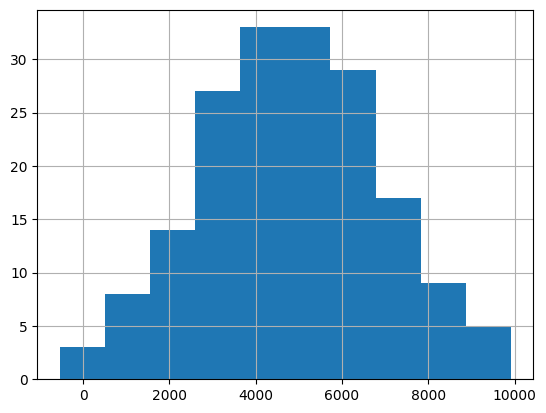

In [91]:
amir_deals["amount"].hist(bins=10)
plt.show()

Its observed that the `amount` data from `amir_deals` follows a normal distribution curve

_____
## Summarizing
Understanding exactly when to use which function -- and why. <br>
<br>

### 1. Discrete distribution (Binomial Distribution)

In [92]:
# Flipping a coin 10 times ; check for probability of getting EXACTLY 7 heads

binom.pmf(7, n=10, p=0.5)

np.float64(0.11718749999999996)

In [93]:
# Flipping a coin 10 times ; check for probability of getting ATMOST 7 heads
binom.cdf(7,10,0.5)

np.float64(0.9453125)

In [94]:
#  Probability of getting exactly 3 sixes in 10 rolls
# x=3 is no. of successes, size=10 is no. of trials, p=1/6 is probability of success
from scipy.stats import binom
binom.pmf(3, n=10, p=1/6)	

np.float64(0.1550453595742519)

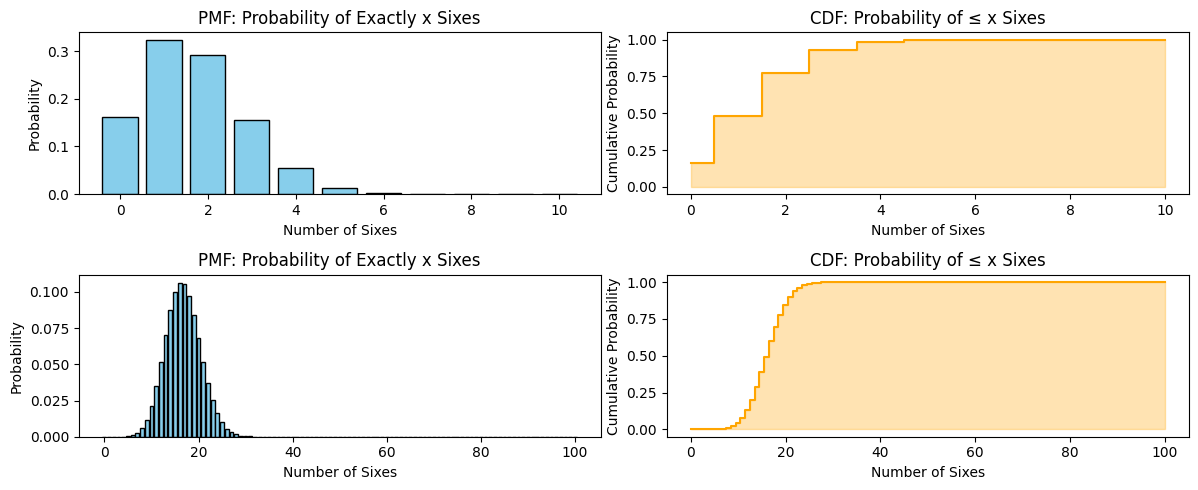

In [95]:
n = 10       # number of trials (rolls)
p = 1/6      # probability of success (rolling a 6)
x = np.arange(0, n+1)  # possible outcomes: 0 through 10

n1 = 100
p1 = 1/6
x1 = np.arange(0, n1+1)  # possible outcomes: 0 through 10


# Calculate PMF and CDF
pmf_vals = binom.pmf(x, n, p)
cdf_vals = binom.cdf(x, n, p)

pmf_vals1 = binom.pmf(x1, n1, p1)
cdf_vals1 = binom.cdf(x1, n1, p1)

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(12, 5),sharey=False)

# PMF Plot
ax[0,0].bar(x, pmf_vals, color="skyblue", edgecolor="black")
ax[0,0].set_title("PMF: Probability of Exactly x Sixes")
ax[0,0].set_xlabel("Number of Sixes")
ax[0,0].set_ylabel("Probability")

# CDF Plot
ax[0,1].step(x, cdf_vals, where="mid", color="orange")
ax[0,1].fill_between(x, cdf_vals, step="mid", alpha=0.3, color="orange")
ax[0,1].set_title("CDF: Probability of ≤ x Sixes")
ax[0,1].set_xlabel("Number of Sixes")
ax[0,1].set_ylabel("Cumulative Probability")

# PMF1 Plot
ax[1,0].bar(x1, pmf_vals1, color="skyblue", edgecolor="black")
ax[1,0].set_title("PMF: Probability of Exactly x Sixes")
ax[1,0].set_xlabel("Number of Sixes")
ax[1,0].set_ylabel("Probability")

# CDF1 Plot
ax[1,1].step(x1, cdf_vals1, where="mid", color="orange")
ax[1,1].fill_between(x1, cdf_vals1, step="mid", alpha=0.3, color="orange")
ax[1,1].set_title("CDF: Probability of ≤ x Sixes")
ax[1,1].set_xlabel("Number of Sixes")
ax[1,1].set_ylabel("Cumulative Probability")


plt.tight_layout()
plt.show()

### 2. Continuous distribution (Normal Distribution)
The cumulative distribution function `norm.cdf()` gives the probability that a random variable is less than or equal to a certain value. <br> 
Rgw `norm.cdf()` answers the question:
_<blockquote> "What % of people are shorter than 154 cm?" <blockquote>_

In [96]:
# Probability that a person has height<154cm for given sample population with mean height 161cm & Std_dev 7
from scipy.stats import norm
norm.cdf(154, loc=161, scale=7)

np.float64(0.15865525393145707)

So there's a 15% chance of a person has height<154cm for given sample population. <br>
<br>
Use `norm.ppf()` when you’re given a percentile/probability and want to find the corresponding data point.

In [97]:
# What is the height below which 15% of the populaition falls?
norm.ppf(0.15, loc=161, scale=7)

np.float64(153.74496627354347)

So 15% of the above population sample falls below 154cm. <br>
<br>
Similarly we can also find above what height does 30% of the population lie?

In [98]:
norm.ppf((1-0.30), loc=161, scale=7)

np.float64(164.6708035889563)

So, 30% of the population has height above 164cm

____
# Poisson Distribution
Its a kind of discrete probability distribution over a given interval of time.  <br>
Helps to answer questions such as:

_<blockquote>If X is the avg. occurrence of events over a given time interval,<br> then what's the probability of Y events taking place in the same time interval?</blockquote>_
<br>

### Scenario 1:  `P(# events in a time interval = k)` - `poisson.pmf()`


In [99]:
# Probability that an event occurs 5 times over a time interval where it occurrs on average of 8 times over same time interval
from scipy.stats import poisson
poisson.pmf(5,8)


np.float64(0.09160366159257921)

> So there's about 9% probability for the event to occur **exactly** 5 times over the time interval
### Scenario 2:  `P(# events in a time interval <=k)` - `poisson.cdf()`

In [100]:
# Probability that an event occurs for atmost 5 times over a time interval where it occurrs on average of 8 times over same time interval
from scipy.stats import poisson
poisson.cdf(5,8)

np.float64(0.19123606207962535)

> So there's about 19% probability for the event to occur **upto** 5 times over the time interval
### Scenario 3:  `P(# events in a time interval >=k)` - `poisson.cdf()`

In [101]:
# Probability that an event occurs for atleast 5 times over a time interval where it occurrs on average of 8 times over same time interval
from scipy.stats import poisson
1 - poisson.cdf(5,8)

np.float64(0.8087639379203746)

> Thus there's 80% chance for the evnet ot occur for **alteast 5 times** in a week given that it occurrs 8  times on average

____
## Sampling a Poisson distribution
Using the `poisson.rvs()` function to generate a list of values that representsd a poisson sampling distribution. `poisson.rvs()` takes a parameter `mu` **(the average rate)** and `size` **(the number of random numbers to generate)** as input, and returns an array of random numbers drawn from the Poisson distribution with that mean. 
<br>

### Scenario 1: Sampling over 10 weeks for an event occur
Given that average rate of occurrence is 8times per week

In [102]:
a = poisson.rvs(mu=8, size=10)
a

array([12,  5,  8,  6,  7, 10,  7,  3,  8,  5])

Check if CLT still holds true!

In [103]:
b = poisson.rvs(mu=8, size=100)
c = poisson.rvs(mu=8, size=1000)
d = poisson.rvs(mu=8, size=10000)

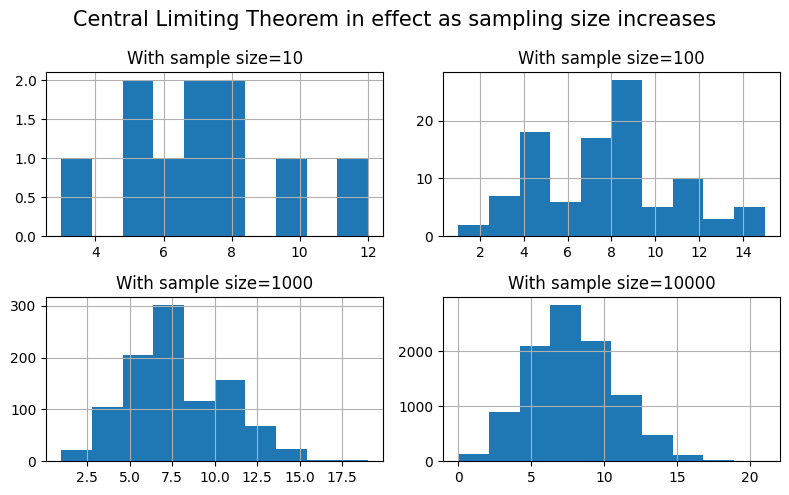

In [104]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))
ax[0,0].hist(a)
ax[0,1].hist(b)
ax[1,0].hist(c)
ax[1,1].hist(d)

ax[0, 0].set_title('With sample size=10')
ax[0, 1].set_title('With sample size=100')
ax[1, 0].set_title('With sample size=1000')
ax[1, 1].set_title('With sample size=10000')
# Enabling gridlines to each subplot
for ax in ax.flat:
    ax.grid(True) # Add default gridlines

fig.suptitle("Central Limiting Theorem in effect as sampling size increases",fontsize=15)
plt.tight_layout()
plt.show()


___
### Test Questions

A company tracks new sales leads by organizing them into a queue so that anyone can follow up on one when required. Since the number of lead responses is **a countable outcome over a period of time**, this scenario corresponds to a Poisson distribution. On average, Amir responds to **4 leads each day**. In this exercise, you'll calculate probabilities of Amir responding to different numbers of leads.
<br>
**Q: Calculate the probability that Amir responds to 5 leads in a day, given that he responds to an average of 4.**

In [105]:
poisson.pmf(5,4)

np.float64(0.1562934518505317)

**Q: Amir's coworker responds to an average of 5.5 leads per day. What is the probability that she answers 5 leads in a day?**

In [106]:
poisson.pmf(5,5.5)

np.float64(0.17140068409793663)

_NOTE that we are talking of exact 5 calls or exact 5.5 calls, hence `poisson.pmf()` has been used to calculate the resp. probabilities_
<br><br>
**Q: What's the probability that Amir responds to 2 or fewer leads in a day?**

In [107]:
poisson.cdf(2,4)

np.float64(0.23810330555354436)

**Q: What's the probability that Amir responds to more than 10 leads in a day?**

In [108]:
1 - poisson.cdf(10,4)

np.float64(0.0028397661205137315)

____
## Exponential distribution
Its a continuous probability distribution that describes the time between events in a Poisson process — a process where events occur independently and at a constant average rate. It models the time until the next event happens.

### Scenario-1: How long until a new request is created? `P(wait < 1min)`
For example a service request ticket is created very 2minutes. So 0.5ticket is created every 1minute. <br>
Here λ = 0.5 So scale = 1/λ = 2

In [109]:
# Probability for having to wait <1min for a new ticket to be created 
from scipy.stats import expon
expon.cdf(1, scale=2)

np.float64(0.3934693402873666)

> _So there's a 30% chance a new ticket will be created in less than a minute_

### Scenario-2: How long until a new request is created? `P(wait > 4min)`

In [110]:
1 - expon.cdf(4,scale=2)

np.float64(0.1353352832366127)

> _So there's a 13% chance a new ticket will be created after a wait time of 4+minutes_

### Scenario-3: How long until a new request is created? `P(1min< wait< 4min)`


In [111]:
expon.cdf(4, scale=2) - expon.cdf(1, scale=2)

np.float64(0.4711953764760207)

> _So there's a 47% chance a new ticket will be created 1 to 4 mins_


____
### Test Questions
To further evaluate Amir's performance, you want to know how much time it takes him to respond to a lead after he opens it. On average, he responds to 1 request every 2.5 hours. In this exercise, you'll calculate probabilities of different amounts of time passing between Amir receiving a lead and sending a response.<br>
<br>

**Q: Import expon from scipy.stats. What's the probability it takes Amir less than an hour to respond to a lead?**

In [112]:
expon.cdf(1,scale =2.5)

np.float64(0.3296799539643607)

**Q: What's the probability it takes Amir more than 4 hours to respond to a lead?**

In [113]:
1- expon.cdf(4,scale=2.5)

np.float64(0.20189651799465536)

**Q: What's the probability it takes Amir 3-4 hours to respond to a lead?**

In [114]:
expon.cdf(4,scale=2.5) - expon.cdf(3,scale=2.5)

np.float64(0.09929769391754684)

______
# Correlation and Experimental Design
**Objectives**: to learn how to quantify the strength of a linear relationship between two variables, and explore how confounding variables can affect the relationship between two other variables
Variable on the x-axis is an independent variable while that onthe y-axis is dependent variable. <br>
<br>
Examples: 

___
### Co-efficient of correlation:
Magniutudes `describes the strength` of the correlation while the direction describes its natue (i.e. whether `Positive` or `Negative correlation` exists)
___
### Visualizing relationships
- Analyzing the correlation between sleep durations & caffeine intake for a cohort of university students
- Using `seaborn` for plotting the correlations over a scatter

> We're tring to answer the question - “Does sleep duration affect coffee intake?”



In [170]:
import seaborn as sns
# Importing the university sleep quality dataset from kaggle
energy_con = pd.read_csv('./course_datasets/stats_datasets/global_energy_consumption.csv').head(500)

In [171]:
energy_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          500 non-null    object 
 1   Year                             500 non-null    int64  
 2   Total Energy Consumption (TWh)   500 non-null    float64
 3   Per Capita Energy Use (kWh)      500 non-null    float64
 4   Renewable Energy Share (%)       500 non-null    float64
 5   Fossil Fuel Dependency (%)       500 non-null    float64
 6   Industrial Energy Use (%)        500 non-null    float64
 7   Household Energy Use (%)         500 non-null    float64
 8   Carbon Emissions (Million Tons)  500 non-null    float64
 9   Energy Price Index (USD/kWh)     500 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 39.2+ KB


In [195]:
energy1 = energy_con.groupby(["Year"])[["Total Energy Consumption (TWh)","Carbon Emissions (Million Tons)"]].agg('sum','sum')
energy1

,Total Energy Consumption (TWh),Carbon Emissions (Million Tons)
Year,,
2000,58981.80,31533.19
2001,100449.05,59379.91
2002,102059.04,52737.68
2003,113309.75,56001.58
2004,136357.35,44480.89
2005,79628.85,41681.18
2006,87125.62,44157.05
2007,69690.56,41799.27
2008,89308.75,56815.44


We'll analyzing correlation between sleep duration (independent variable - x-axis) & caffeine intake (dependent variable - y-axis)

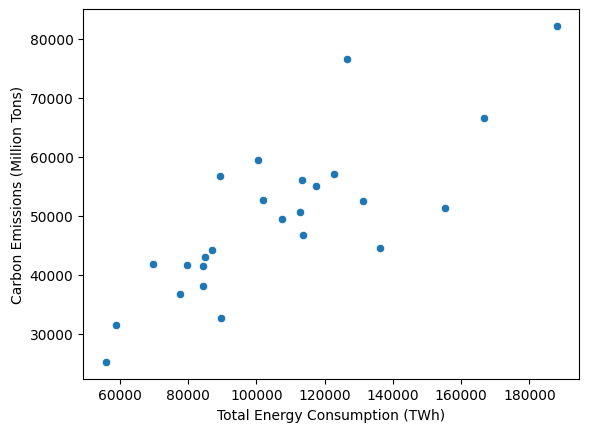

In [197]:
sns.scatterplot(x="Total Energy Consumption (TWh)" , y="Carbon Emissions (Million Tons)" , data=energy1)
plt.show()

#### Adding a linear trendline to the scatter plot

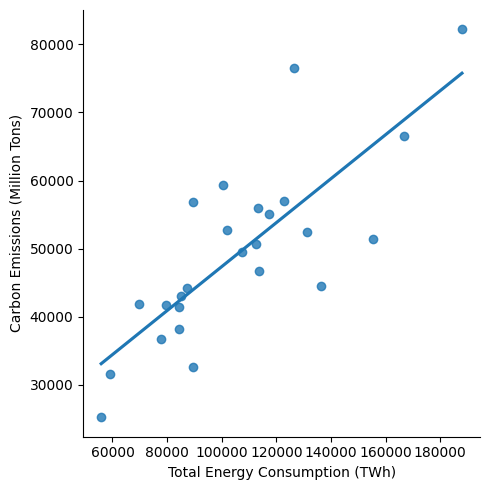

In [199]:
sns.lmplot(x="Total Energy Consumption (TWh)" , y="Carbon Emissions (Million Tons)" , data=energy1, ci=None)
plt.show()

### Calculating the correlation coefficient

In [201]:
energy1["Total Energy Consumption (TWh)"].corr(energy1["Carbon Emissions (Million Tons)"])

np.float64(0.794890996100458)

> ### So we can observe that there's a relatively strong correlation between the x & y-axis variables

____
### Test Questions
You'll be working with a dataset containing results from the 2019 World Happiness Report that scores various countries based on how happy people 
in that country are. It also ranks each country on various societal aspects such as social support, freedom, corruption, and others. The dataset also includes the GDP per capita and life expectancy for each country.

In [206]:
world_happiness = pd.read_csv('./course_datasets/stats_datasets/world_happiness.csv')
world_happiness.head()

,Unnamed: 0,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


**Q: Create a scatterplot of happiness_score vs. life_exp (without a trendline) using seaborn.**

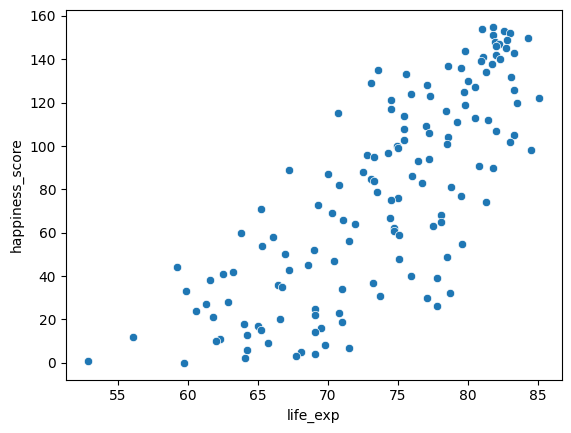

In [207]:
sns.scatterplot(x= "life_exp", y="happiness_score", data=world_happiness)
plt.show()

**Q: Create a scatterplot of happiness_score vs. life_exp with a linear trendline using seaborn, setting ci to None.**

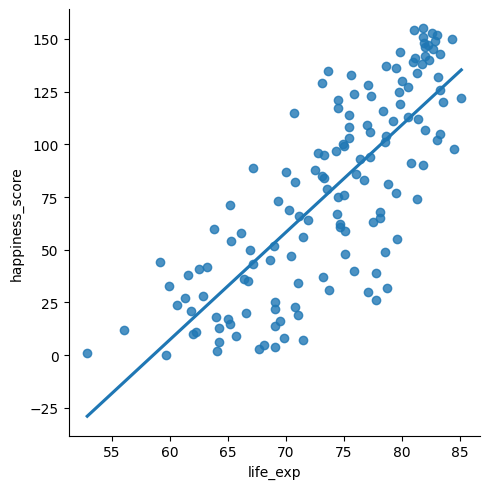

In [208]:
sns.lmplot(x= "life_exp", y="happiness_score", data=world_happiness, ci=None)
plt.show()

**Q: Based on the scatterplot, which is most likely the correlation between life_exp and happiness_score?** <br>
**Q: Calculate the correlation between life_exp and happiness_score. Save this as cor.**

In [209]:
world_happiness["life_exp"].corr(world_happiness["happiness_score"])

np.float64(0.7802249053272062)

_____
## Limitations to Correlation
## What to do when there's a correlation but its not linear?
### Scenario 1: Quadratic Relationship (U-shaped)
Test anxiety vs. performance: 
- Moderate anxiety helps you perform well.
- However Too low or too high anxiety reduces performance.

Pearson Correlation (Quadratic):           x         y
x  1.000000  0.005494
y  0.005494  1.000000


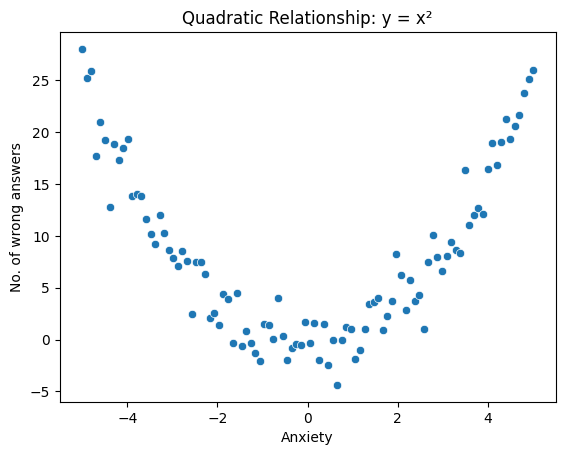

In [214]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Quadratic relationship
x = np.linspace(-5, 5, 100)
y = x**2 + np.random.normal(0, 2, 100)

df1 = pd.DataFrame({'x': x, 'y': y})
print("Pearson Correlation (Quadratic):", df1.corr())

sns.scatterplot(x=x, y=y)
plt.title("Quadratic Relationship: y = x²")
plt.xlabel("Anxiety")
plt.ylabel("No. of wrong answers")
plt.show()

In above example, since the curve looks like a parabola, it has a `quadratic (U-shaped) relationship`. So a polynomial regression is the most suitable approach — specifically, 2nd-degree polynomial regression. <br>

> ### Why Polynomial Works Here?
> Upon plotting the data, its observed to follows a curve that resembles a parabola & thus cannot be modeled with a straight line.<br>
> `np.polyfit()` finds the best-fitting polynomial curve using least squares.

In [218]:
# Fit a 2nd-degree polynomial
coeffs = np.polyfit(df1["x"], df1["y"], deg=2)

# Generate fitted curve
x_fit = np.linspace(-5, 5, 100)
y_fit = np.polyval(coeffs, x_fit)

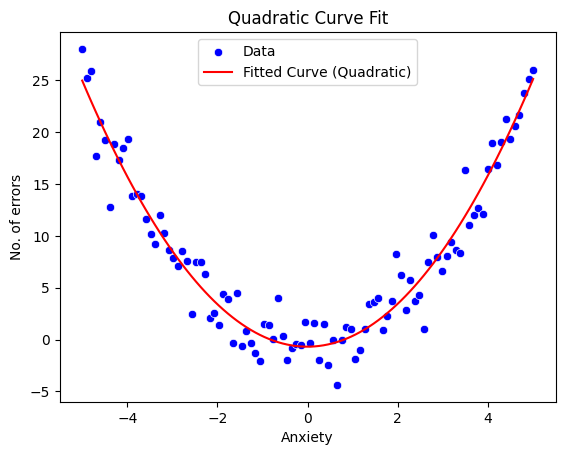

In [221]:
# Plot
sns.scatterplot(x="x", y="y", data=df1, label="Data", color="blue")
plt.plot(x_fit, y_fit, color="red", label="Fitted Curve (Quadratic)")
plt.title("Quadratic Curve Fit")
plt.xlabel("Anxiety")
plt.ylabel("No. of errors")
plt.legend()
plt.show()

____
## An example where linear regression didnt work ❌ but polynomial regression worked ✅

Pearson Correlation: -0.00


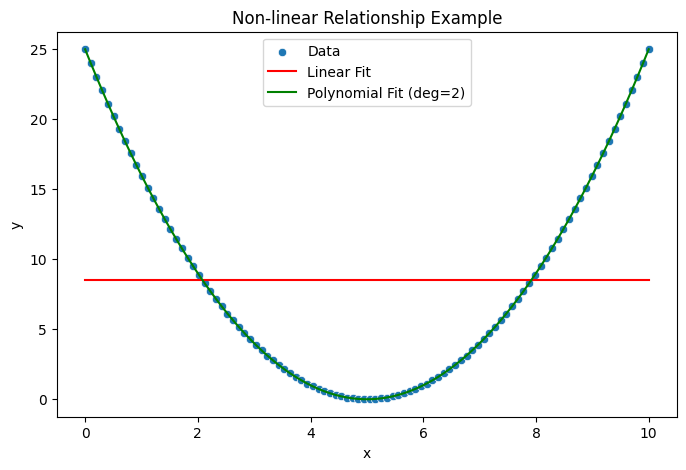

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate data
x = np.linspace(0, 10, 100)
y = (x - 5) ** 2  # Non-linear relationship

# Convert to DataFrame
df = pd.DataFrame({"x": x, "y": y})

# Pearson correlation (measures linearity)
corr, _ = pearsonr(df["x"], df["y"])
print(f"Pearson Correlation: {corr:.2f}")

# Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x="x", y="y", data=df, label="Data")

# Linear Regression (fails)
model_linear = LinearRegression()
model_linear.fit(df[["x"]], df["y"])
plt.plot(x, model_linear.predict(df[["x"]]), label="Linear Fit", color='red')

# Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[["x"]])
model_poly = LinearRegression().fit(X_poly, df["y"])
plt.plot(x, model_poly.predict(X_poly), label="Polynomial Fit (deg=2)", color='green')

plt.legend()
plt.title("Non-linear Relationship Example")
plt.show()


_____
